## PyTorch Tutorial: Building and Training Neural Networks

This tutorial provides a detailed guide on how to construct, train, and evaluate neural networks in PyTorch. It includes explanations of essential components such as models, layers, optimizers, learning rate schedulers, loss functions, and metrics.

Advantages of PyTorch:

- Flexible Dynamic Computation Graphs: PyTorch utilizes dynamic computation graphs (define-by-run), making model definition and debugging more flexible and intuitive. Developers can modify the model structure on-the-fly during runtime, facilitating experimentation and rapid iteration.

- Pythonic Interface and Ease of Use: PyTorch offers interfaces that align with Python programming practices, featuring clean and straightforward syntax that is easy to learn and use. This design philosophy allows developers to write code more naturally, reducing the learning curve and enhancing development efficiency.

- Robust Research Community and Ecosystem: PyTorch is widely adopted in the academic research community, supported by an active user base and a wealth of third-party libraries. Many cutting-edge research advancements and tools are first implemented in PyTorch, fostering innovation and the rapid development of new technologies.

- Deployment and Production Support: PyTorch provides production-grade tools such as TorchServe and TorchScript, enabling efficient deployment of trained models to production environments and mobile devices. Compatibility with ONNX allows PyTorch models to be easily converted and deployed across various platforms, ensuring stability and performance in real-world applications.

- Scalability and Distributed Computing: PyTorch boasts strong distributed training capabilities through features like PyTorch Distributed, supporting the training of large-scale datasets and models. Its excellent scalability allows it to meet high-performance computing demands, making it suitable for large projects and complex application scenarios.

These advantages make PyTorch a standout tool in the deep learning landscape, excelling in research, development, and production deployment.

## 1. Setting Up the Environment
Before we start, ensure that PyTorch is installed. If not, you can install it using:

```bash
pip install torch torchvision
```

For installation instructions and CUDA compatibility, refer to the [official PyTorch installation guide](https://pytorch.org/get-started/locally/).

---

## 2. Building a Neural Network Model
In PyTorch, a neural network is defined as a subclass of `torch.nn.Module`. Here’s an example of a simple feedforward neural network:

### Code Example:
```python
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Example: Initialize the model
input_size = 784  # For MNIST (28x28 images flattened)
hidden_size = 128
output_size = 10   # Number of classes
model = SimpleNN(input_size, hidden_size, output_size)
print(model)
```

For more details, refer to the [torch.nn documentation](https://pytorch.org/docs/stable/nn.html).

---

## 3. Layers
PyTorch provides a wide range of layers in the `torch.nn` module. Here are some common layers:

- **Linear (Fully Connected):** `nn.Linear`
- **Convolutional Layers:** `nn.Conv2d`
- **Pooling Layers:** `nn.MaxPool2d`, `nn.AvgPool2d`
- **Activation Functions:** `nn.ReLU`, `nn.Sigmoid`, `nn.Tanh`
- **Dropout:** `nn.Dropout`

Explore more layers in the [torch.nn documentation](https://pytorch.org/docs/stable/nn.html).

---

## 4. Optimizers
Optimizers are used to update the weights of the model. PyTorch provides optimizers in the `torch.optim` module.

### Code Example:
```python
import torch.optim as optim

# Example: Using Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
```

For a complete list of optimizers, refer to the [torch.optim documentation](https://pytorch.org/docs/stable/optim.html).

---

## 5. Learning Rate Scheduler
Learning rate schedulers adjust the learning rate during training. PyTorch provides several schedulers in `torch.optim.lr_scheduler`.

### Code Example:
```python
from torch.optim.lr_scheduler import StepLR

# Example: Step learning rate scheduler
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
```

More learning rate schedulers are available in the [torch.optim.lr_scheduler documentation](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate).

---

## 6. Loss Functions
Loss functions measure the difference between the predicted and actual values. Common loss functions include:

- **Classification:** `nn.CrossEntropyLoss`, `nn.NLLLoss`
- **Regression:** `nn.MSELoss`, `nn.L1Loss`

### Code Example:
```python
criterion = nn.CrossEntropyLoss()
```

Explore the complete list of loss functions in the [torch.nn documentation](https://pytorch.org/docs/stable/nn.html#loss-functions).

---

## 7. Training a Model
Training involves the following steps:

1. Forward pass: Compute the predictions.
2. Compute the loss.
3. Backward pass: Compute gradients.
4. Update the weights using the optimizer.

### Code Example:
```python
def train(model, train_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")
```

---

## 8. Evaluating a Model
To evaluate a model, set it to evaluation mode using `model.eval()` and disable gradient computation using `torch.no_grad()`.

### Code Example:
```python
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100:.2f}%")
```

---

## 9. Metrics
Metrics such as accuracy, precision, recall, and F1-score are used to evaluate model performance. PyTorch does not have built-in metrics, but they can be computed manually or using libraries like `torchmetrics`.

### Code Example (Accuracy):
```python
def accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    return (predicted == labels).float().mean().item()
```

Refer to the [torchmetrics library](https://torchmetrics.readthedocs.io/) for more advanced metrics.

---

## 10. Full Example: Putting It All Together
Below is a complete example for training and evaluating a model on the MNIST dataset.

### Code Example:
```python
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model definition
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()

# Loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop
train(model, train_loader, criterion, optimizer, epochs=10)
scheduler.step()

# Evaluation
evaluate(model, test_loader)
```

In [2]:
!pip install torch==2.1.0 torchvision==0.16.0 seaborn

  Using cached torchvision-0.16.0-cp310-cp310-manylinux1_x86_64.whl.metadata (6.6 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached torchvision-0.16.0-cp310-cp310-manylinux1_x86_64.whl (6.9 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1
    Uninstalling torchvision-0.19.1:
      Successfully uninstalled torchvision-0.19.1


## Example 1: Let's do a regression example!
 
 Let's predict fuel efficiency

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
#Data cleaning
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
#Let's convert origin to numeric value
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [7]:
#pd.get_dummies is a function used for one-hot encoding categorical data. 
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


- One-Hot Encoding:

    - Distinct Representation: One-hot encoding creates a unique binary feature (0 or 1) for each category in a categorical variable. This distinct representation ensures that no category is considered more important than another, preventing the model from inferring an ordinal relationship between categories when there isn't one.

    - Interpretability: One-hot encoding is straightforward to interpret because each binary feature corresponds directly to a specific category. It makes it easy to understand which category is associated with a particular observation.

    - Non-linearity: One-hot encoding introduces non-linearity into the model, which can be beneficial when dealing with categorical variables that do not have a natural order or when interactions between categories are significant.

    - Suitable for Most Algorithms: One-hot encoding is compatible with a wide range of machine learning algorithms, including linear models, decision trees, random forests, and neural networks. It's a safe choice in many scenarios.

In [8]:
#let's split the data into training and testing!
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

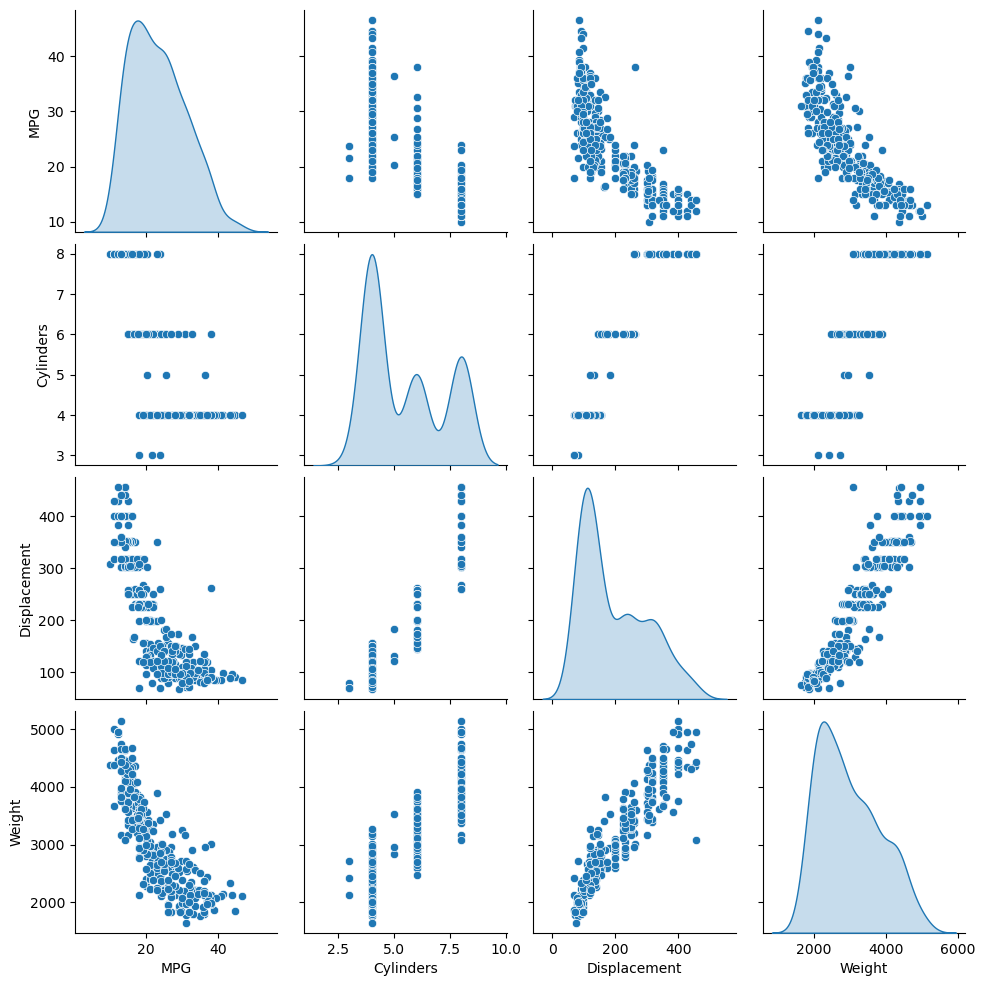

In [9]:
#Let's look at the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [10]:
#Let's split the features (x) from the labels (y)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [11]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,False,False,True
282,4,140.0,88.0,2890.0,17.3,79,False,False,True
69,8,350.0,160.0,4456.0,13.5,72,False,False,True
378,4,105.0,63.0,2125.0,14.7,82,False,False,True
331,4,97.0,67.0,2145.0,18.0,80,False,True,False
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,False,False,True
229,8,400.0,180.0,4220.0,11.1,77,False,False,True
150,4,108.0,93.0,2391.0,15.5,74,False,True,False
145,4,83.0,61.0,2003.0,19.0,74,False,True,False


In [12]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

- Faster Convergence: Normalized data typically leads to faster convergence during the training process. Neural networks are optimized using gradient-based methods, and normalizing the data can help ensure that the optimization landscape is smoother. This often results in the model converging to a good solution more quickly.

- Numerical Stability: Normalizing data can prevent numerical instability issues during training. Large input values can cause gradients to become very small (vanishing gradients) or very large (exploding gradients), making training difficult or unstable. Normalizing inputs to a smaller range helps mitigate these problems.

- Improved Generalization: Normalization can lead to better generalization performance. When features have widely varying scales, the model may assign disproportionately more importance to features with larger values. This can lead to suboptimal generalization, as some features may dominate the learning process. Normalization ensures that all features contribute more equally to the learning process.

- Model Robustness: Normalized data makes the model more robust to changes in the scale of input features. If the scale of a feature changes (e.g., due to different units or measurement scales), a properly normalized model is less likely to be affected by such changes.

- Regularization: Normalization can act as a form of regularization. By constraining the input data to a certain range (e.g., between 0 and 1 or with a mean of 0 and standard deviation of 1), it can help prevent overfitting, especially when the training dataset is small.

- Efficient Optimization: Many optimization algorithms assume that the input data is centered around zero and has a similar scale across dimensions. Normalization helps fulfill these assumptions and can lead to more efficient optimization.

In [13]:
# scale and normalize features or variables within a dataset. it helps make different features or variables more comparable

# Normalize the data
class Normalize:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, data):
        self.mean = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)

    def transform(self, data):
        return (data - self.mean) / self.std

normalizer = Normalize()
normalizer.fit(train_features.values.astype(np.float32))
print(normalizer.mean)

[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
 7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]


In [14]:
# Convert data to PyTorch tensors
train_features = torch.tensor(train_features.values.astype(np.float32), dtype=torch.float32)
test_features = torch.tensor(test_features.values.astype(np.float32), dtype=torch.float32)
train_labels = torch.tensor(train_labels.values, dtype=torch.float32).unsqueeze(1)
test_labels = torch.tensor(test_labels.values, dtype=torch.float32).unsqueeze(1)

# Define the datasets and loaders
class MPGDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = MPGDataset(train_features, train_labels)
test_dataset = MPGDataset(test_features, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [15]:
## Let's do a linear model first!

# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Train and evaluate the linear model
input_dim = train_features.shape[1]
linear_model = LinearModel(input_dim)

criterion = nn.L1Loss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.1)

In [16]:
# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=100):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for features, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))
    return train_losses

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(test_loader)

In [17]:
%%time
linear_losses = train_model(linear_model, train_loader, criterion, optimizer)
linear_loss = evaluate_model(linear_model, test_loader)
print(f'Linear Model Test Loss: {linear_loss}')

Linear Model Test Loss: 60.888657887776695
CPU times: user 592 ms, sys: 33 ms, total: 625 ms
Wall time: 625 ms


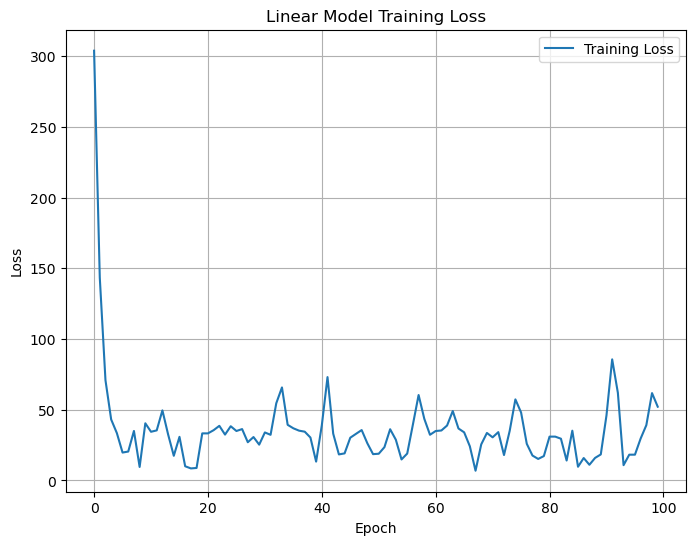

In [18]:
# Plot training loss
def plot_training_loss(losses, title):
    plt.figure(figsize=(8, 6))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_loss(linear_losses, 'Linear Model Training Loss')

In [19]:
# Inference function
def inference(model, features, labels):
    model.eval()
    with torch.no_grad():
        predictions = model(features).numpy()
        true_values = labels.numpy()
    return predictions, true_values

# Inference on test data
def evaluate_test_data(model, test_features, test_labels):
    predictions, true_values = inference(model, test_features, test_labels)
    mae = np.mean(np.abs(predictions - true_values))
    print(f"Mean Absolute Error on Test Data: {mae}")
    return mae

test_results = dict()
print("Linear Model Inference:")
test_results['linear_model'] = evaluate_test_data(linear_model, test_features, test_labels)

Linear Model Inference:
Mean Absolute Error on Test Data: 63.183895111083984


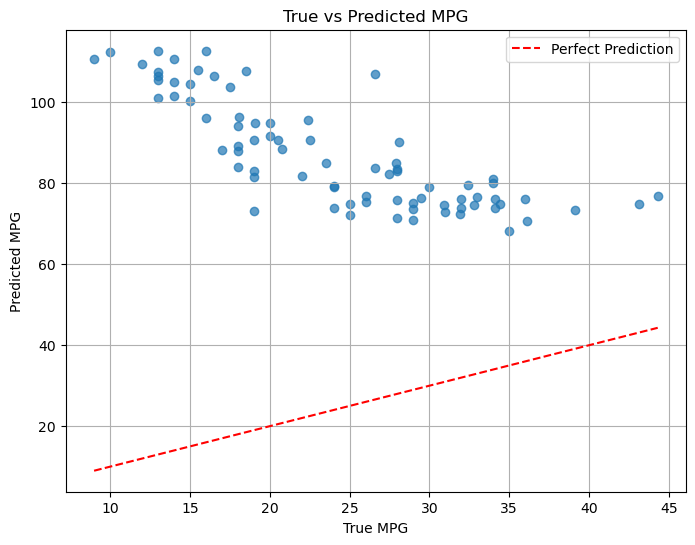

In [20]:
# Predict and visualize predictions
def visualize_predictions(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for features, labels in test_loader:
            predictions = model(features)
            all_predictions.extend(predictions.numpy())
            all_labels.extend(labels.numpy())

    plt.figure(figsize=(8, 6))
    plt.scatter(all_labels, all_predictions, alpha=0.7)
    plt.plot([min(all_labels), max(all_labels)], [min(all_labels), max(all_labels)], 'r--', label='Perfect Prediction')
    plt.xlabel('True MPG')
    plt.ylabel('Predicted MPG')
    plt.title('True vs Predicted MPG')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_predictions(linear_model, test_loader)


In [21]:
# Let's now try a DNN

# Define the DNN model
class DNNModel(nn.Module):
    def __init__(self, input_dim):
        super(DNNModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

# Train and evaluate the DNN model
dnn_model = DNNModel(input_dim)
optimizer = optim.Adam(dnn_model.parameters(), lr=0.001)

In [22]:
%%time
dnn_losses = train_model(dnn_model, train_loader, criterion, optimizer)
dnn_loss = evaluate_model(dnn_model, test_loader)
print(f'DNN Model Test Loss: {dnn_loss}')

DNN Model Test Loss: 3.0611247221628823
CPU times: user 7.79 s, sys: 8.58 ms, total: 7.8 s
Wall time: 977 ms


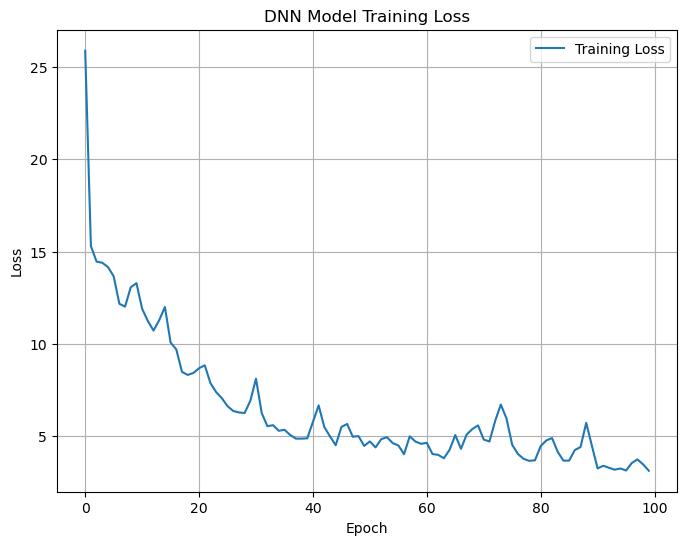

DNN Model Inference:


In [23]:
plot_training_loss(dnn_losses, 'DNN Model Training Loss')
print("DNN Model Inference:")


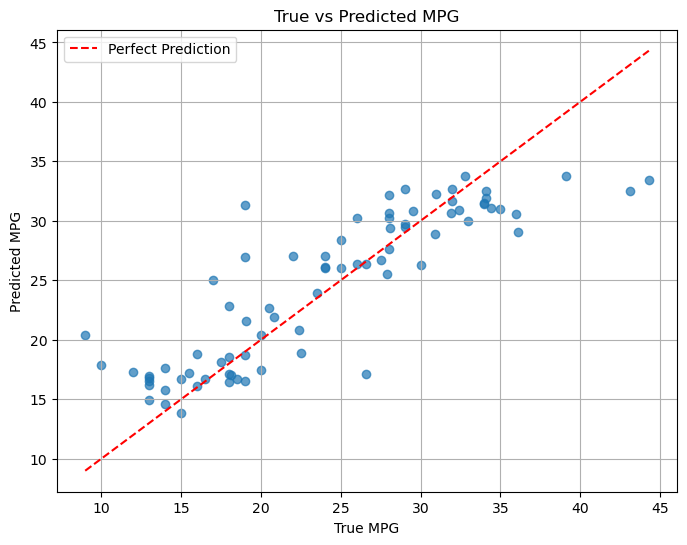

In [24]:
visualize_predictions(dnn_model, test_loader)


In [25]:
print("DNN Model Inference:")
test_results['dnn_model'] = evaluate_test_data(dnn_model, test_features, test_labels)


DNN Model Inference:
Mean Absolute Error on Test Data: 2.984571933746338


In [26]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,63.183895
dnn_model,2.984572


## Example 2: Let's do a classification example!
 
 Let's classify images of clothing!

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 26421880/26421880 [00:01<00:00, 20340314.57it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 328155.13it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6049046.27it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23267539.86it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(len(train_dataset))
sample_image, sample_label = train_dataset[11]
print(sample_image.shape)

60000
torch.Size([1, 28, 28])


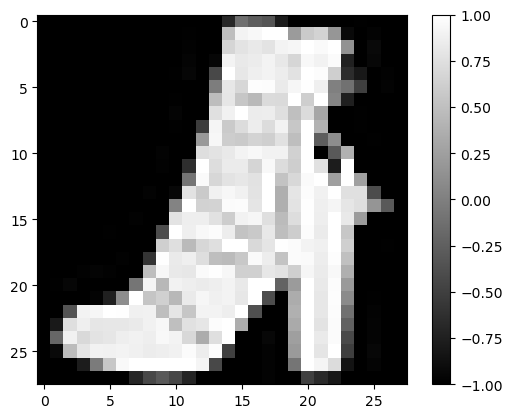

In [29]:
# Let's plot a random image
plt.figure()
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()


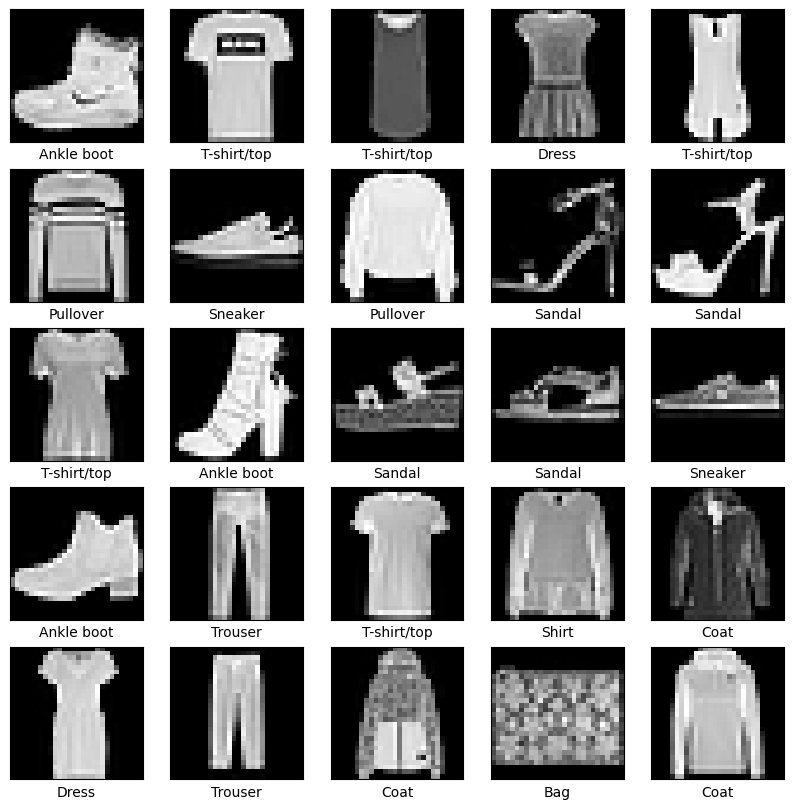

In [30]:
# Plot 25 sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    img, label = train_dataset[i]
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.xlabel(class_names[label])
plt.show()

In [31]:
# Define the model
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [32]:
# Instantiate and compile the model
model = FashionMNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
# Train the model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

Epoch 1/10, Loss: 0.5013
Epoch 2/10, Loss: 0.3813
Epoch 3/10, Loss: 0.3402
Epoch 4/10, Loss: 0.3186
Epoch 5/10, Loss: 0.3004
Epoch 6/10, Loss: 0.2856
Epoch 7/10, Loss: 0.2736
Epoch 8/10, Loss: 0.2619
Epoch 9/10, Loss: 0.2500
Epoch 10/10, Loss: 0.2424


In [34]:
# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

evaluate_model(model, test_loader)

Test Accuracy: 88.10%


In [35]:
# Make predictions
sample_images, sample_labels = next(iter(test_loader))
model.eval()
with torch.no_grad():
    predictions = model(sample_images)
    predicted_classes = torch.argmax(predictions, dim=1)

In [36]:
predictions[0]

tensor([ -8.0749, -16.3942, -11.6350, -17.6025, -16.1762,   1.1407, -10.9830,
          3.3851,  -8.2927,   6.2774])

In [37]:
np.argmax(predictions[0])

tensor(9)

In [38]:
sample_labels[0]

tensor(9)

In [39]:
# Define plot functions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i].item(), img[i].squeeze()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * torch.softmax(predictions_array, dim=0)[predicted_label].item(),
        class_names[true_label]),
        color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i].item()
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), torch.softmax(predictions_array, dim=0).numpy(), color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

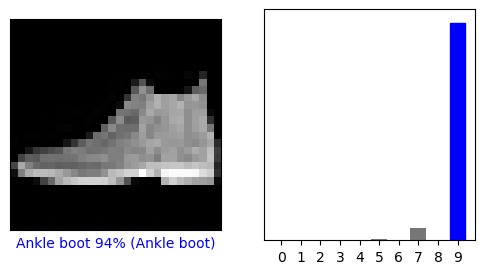

In [40]:
# Visualize a single prediction
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], sample_labels, sample_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], sample_labels)
plt.show()

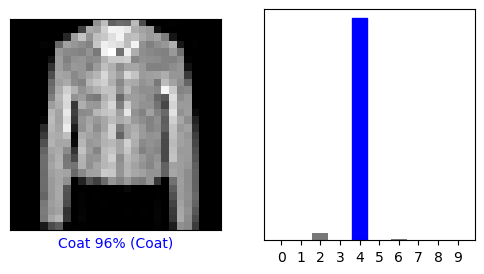

In [41]:
# Visualize another prediction
i = 10
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], sample_labels, sample_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], sample_labels)
plt.show()

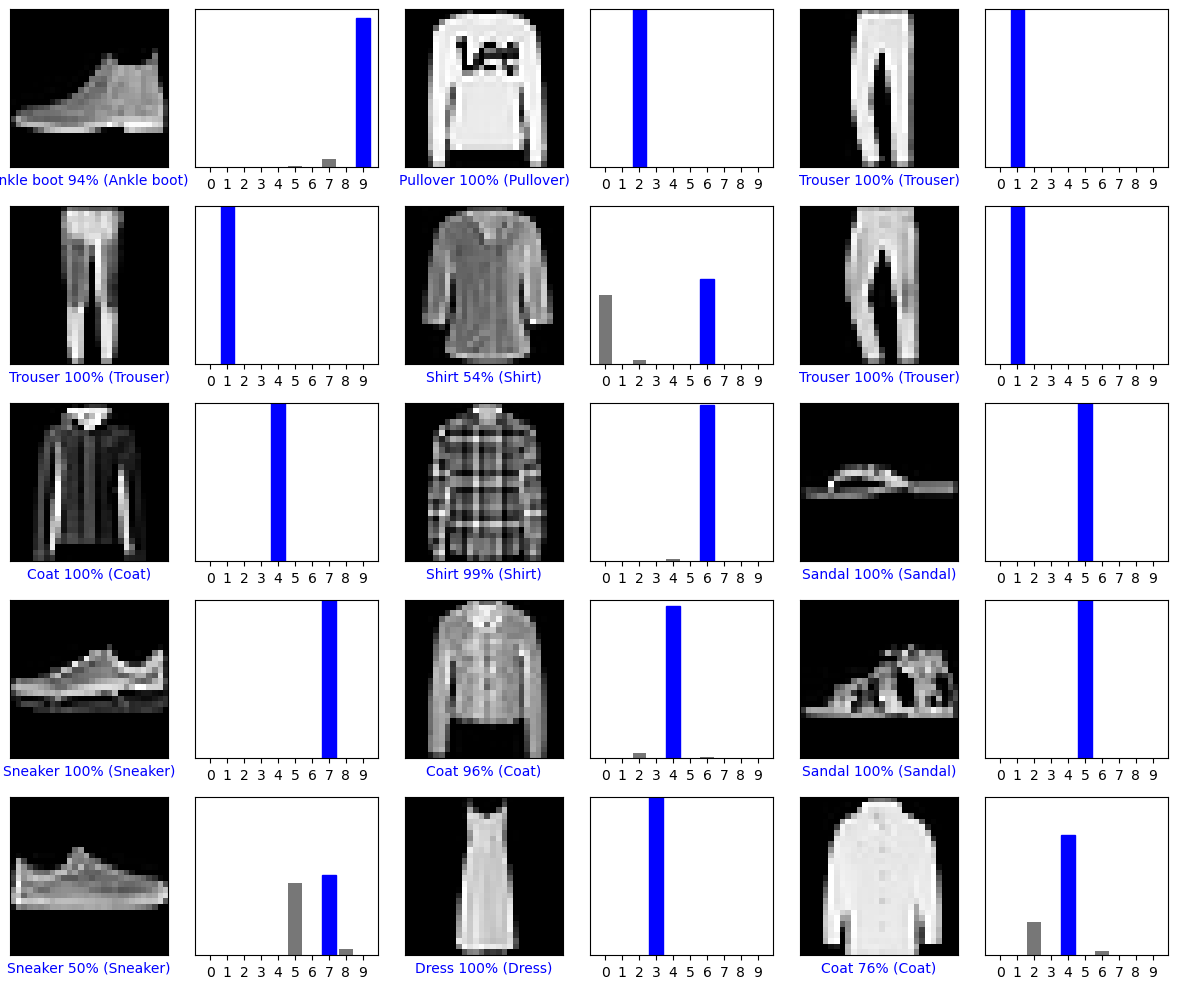

In [42]:
# Plot multiple predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], sample_labels, sample_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], sample_labels)
plt.tight_layout()
plt.show()